# Ablation Studies

User settings:

In [83]:
result_set = [
    'peucrl_minus_r_8',
    'peucrl_minus_r_minus_action_pruning',
    'peucrl_minus_r_minus_shield_6',
    'peucrl_minus_r_minus_safety_3',
]
pretty_result_set = [
    'PeUcrl',
    'PeUcrl\\ActionPruning',
    'PeUcrl\\Shield',
    'PeUcrl\\ActionPruning\\Shield',
]
rolling_window_width = 1000
max_time = 50000

Initialisations:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Sample complexity analysis

What to look for:
- PeUcrl\ActionPruning\Shield will perform best in terms of rewards but worst in terms of safety.
- PeUcrl\ActionPruning will have acceptable safety but it will not decrease over time.
- PeUcrl\Shield will only eventually be safe.

/tmp/ipykernel_1905996/1348852246.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


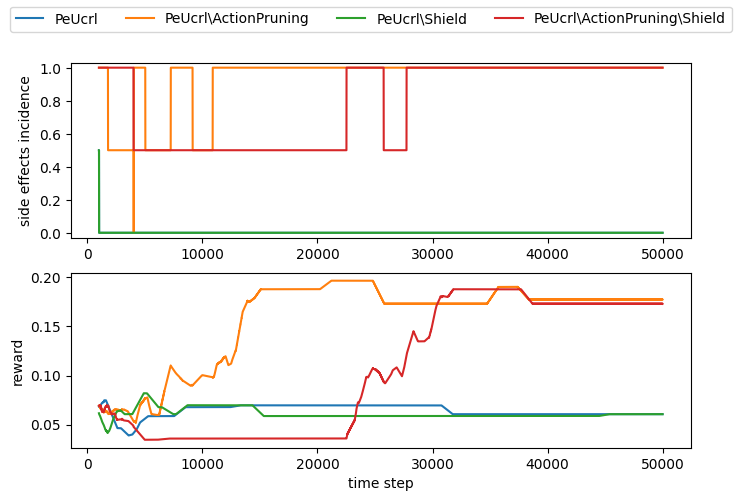

In [150]:
fig, (side_effects_plot, reward_plot) = plt.subplots(2, 1, figsize=(8, 5))

for result in result_set:

    side_effects_incidence = pd.read_csv(
        'results/.' + result + '/data.csv',
        index_col='time_step',
        usecols=['time_step', 'side_effects_incidence'],
    )
    side_effects_plot.plot(side_effects_incidence[:max_time].rolling(rolling_window_width).max())

    reward = pd.read_csv(
        'results/.' + result + '/data.csv',
        index_col='time_step',
        usecols=['time_step', 'reward'],
    )
    reward_plot.plot(reward[:max_time].rolling(rolling_window_width).mean())

fig.legend(pretty_result_set, loc='upper center', ncols=4)
side_effects_plot.set_ylim(-0.03, 1.03)
side_effects_plot.set_ylabel('side effects incidence')
reward_plot.set_ylabel('reward')
reward_plot.set_xlabel('time step')
#fig.suptitle('Sample-Based')


fig.show()

## Time complexity analysis